### Step 1: Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load Data & Exploratory Analysis

In [3]:
# Load dataset
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# Overview
print(train.head())
print(train.info())
print(train.describe())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

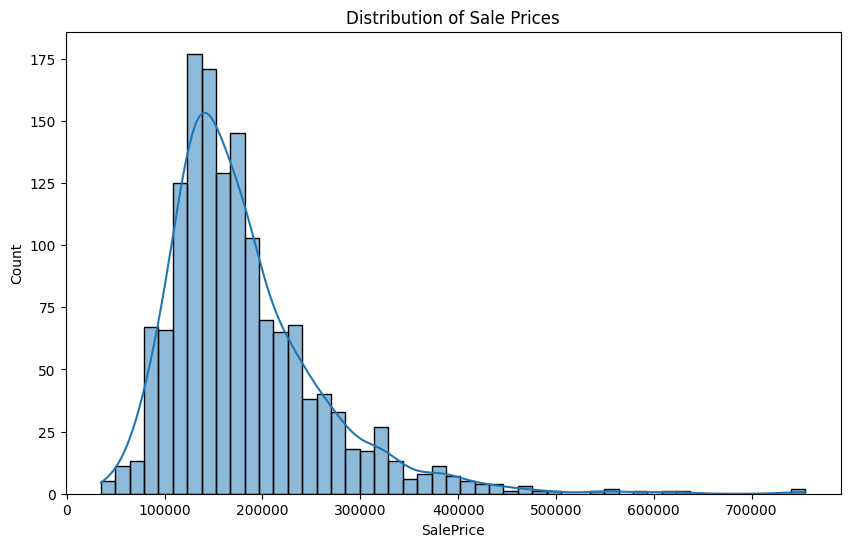

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [5]:
# SalePrice distribution
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'], kde=True)
plt.title("Distribution of Sale Prices")
plt.show()

# Select only numeric columns
numeric_train = train.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numeric_train.corr()
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print(top_corr.head(10))


### Step 3: Preprocessing

In [6]:
# Select numeric columns, excluding SalePrice from features
X = numeric_train.drop('SalePrice', axis=1)
y = numeric_train['SalePrice']

# Fill missing values with median
X = X.fillna(X.median())


### Step 4: Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Step 5: Build Models

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_val)
rmse_lr = np.sqrt(mean_squared_error(y_val, pred_lr))
print("RMSE Linear Regression:", rmse_lr)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_val)
rmse_rf = np.sqrt(mean_squared_error(y_val, pred_rf))
print("RMSE Random Forest:", rmse_rf)


RMSE Linear Regression: 36879.81932192755
RMSE Random Forest: 29159.325958926194


### Step 6: Feature Importance (Random Forest)

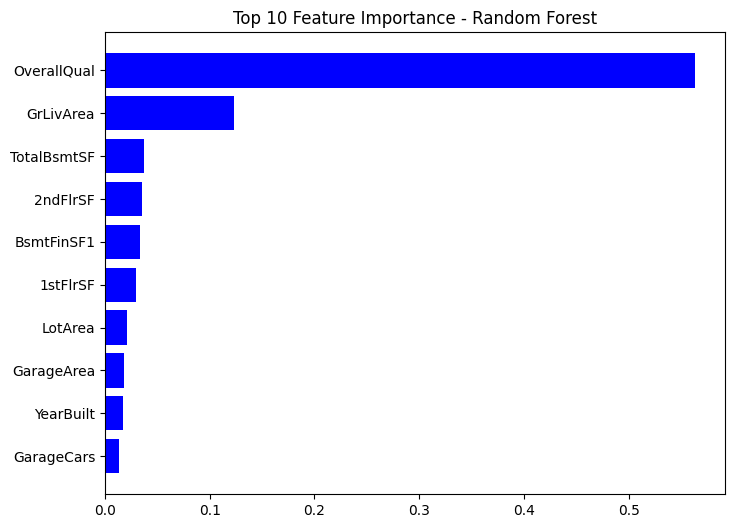

In [9]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(8,6))
plt.title("Top 10 Feature Importance - Random Forest")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.show()


### Step 7: Predictions & Model Evaluation

In [10]:
# Make predictions on the validation set
y_pred_lr = lr.predict(X_val)
y_pred_rf = rf.predict(X_val)

# Compare predictions vs real values
comparison = pd.DataFrame({
    'Actual': y_val,
    'Predicted_LR': y_pred_lr,
    'Predicted_RF': y_pred_rf
})

print(comparison.head(10))


      Actual   Predicted_LR  Predicted_RF
892   154500  153728.355878     142883.00
1105  325000  309240.636439     319407.98
413   115000  112897.287674     115898.04
522   159000  180476.649944     164953.00
1036  315500  294934.414836     314652.21
614    75500   50896.243888      80499.83
218   311500  233798.035264     214410.26
1160  146000  147918.892336     149921.55
649    84500   48537.331351      79936.82
887   135500  149769.912703     132387.54


### Step 8: Regression Metrics

In [11]:
from sklearn.metrics import mean_absolute_error, r2_score

# Linear Regression
mae_lr = mean_absolute_error(y_val, y_pred_lr)
r2_lr = r2_score(y_val, y_pred_lr)

# Random Forest
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

print(f"Linear Regression -> RMSE: {rmse_lr:.2f}, MAE: {mae_lr:.2f}, R2: {r2_lr:.2f}")
print(f"Random Forest -> RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}, R2: {r2_rf:.2f}")


Linear Regression -> RMSE: 36879.82, MAE: 23000.03, R2: 0.82
Random Forest -> RMSE: 29159.33, MAE: 18100.43, R2: 0.89


### Step 9: Visualization of Predictions

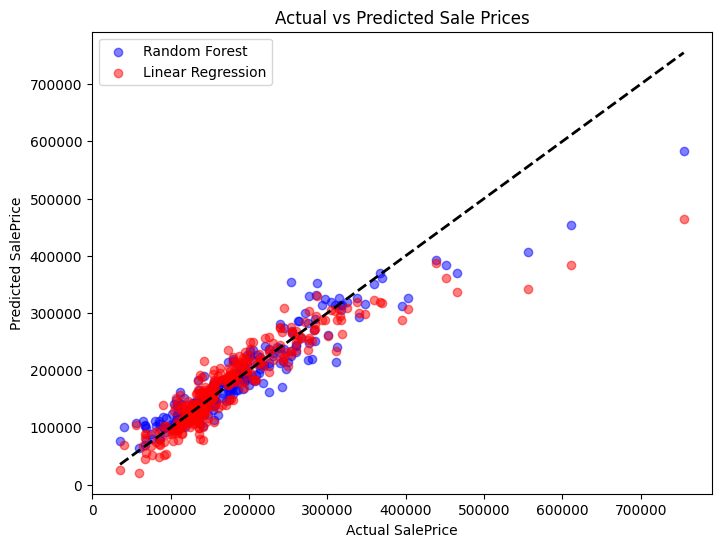

In [12]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_pred_rf, alpha=0.5, color='b', label='Random Forest')
plt.scatter(y_val, y_pred_lr, alpha=0.5, color='r', label='Linear Regression')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Sale Prices")
plt.legend()
plt.show()


### Step 10: Binned Error Matrix

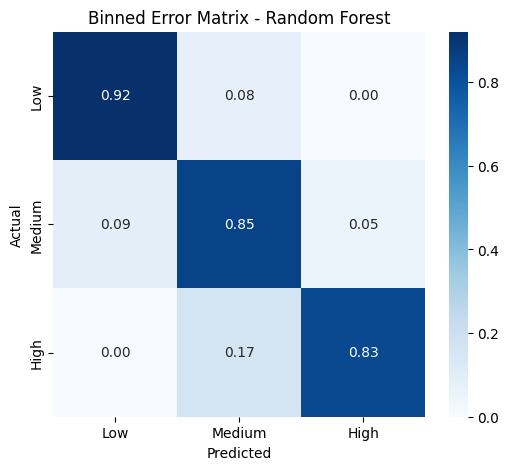

In [14]:
# Define price bins (Low, Medium, High)
bins = [0, 150000, 300000, np.inf]  # adjust based on dataset distribution
labels = ['Low', 'Medium', 'High']

# Convert actual and predicted prices into categories
actual_bins = pd.cut(y_val, bins=bins, labels=labels)
pred_bins = pd.cut(y_pred_rf, bins=bins, labels=labels)

# Create a "confusion matrix" for binned predictions
bin_matrix = pd.crosstab(actual_bins, pred_bins, rownames=['Actual'], colnames=['Predicted'], normalize='index')

# Visualize with heatmap
plt.figure(figsize=(6,5))
sns.heatmap(bin_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Binned Error Matrix - Random Forest")
plt.show()


### Step 11: Residual Analysis
Analyze errors to see where the model performs poorly

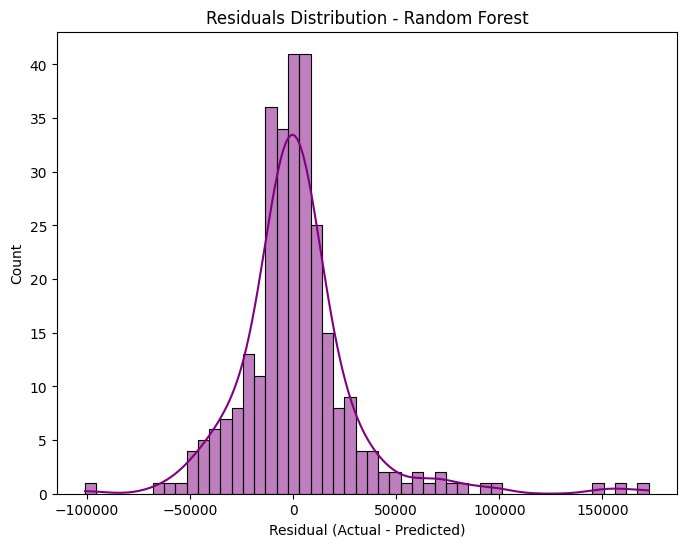

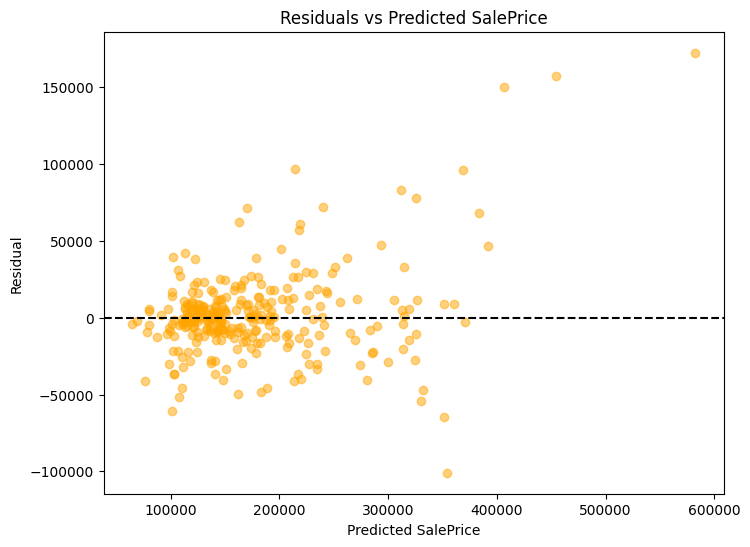

In [15]:
# Residuals
residuals = y_val - y_pred_rf

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=50, color='purple')
plt.title("Residuals Distribution - Random Forest")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()

# Scatter residuals vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_pred_rf, residuals, alpha=0.5, color='orange')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted SalePrice")
plt.show()


Interpretation:
- Residuals should be roughly centered around 0
- Patterns may indicate areas where the model underperforms

### Step 12: Compare Multiple Models
Add other models for a richer comparison

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_val)

# SVR (with default parameters for simplicity)
svr = SVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_val)

# Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
pred_gbr = gbr.predict(X_val)

# Create a metrics dataframe
models = ['Linear Regression', 'Random Forest', 'KNN', 'SVR', 'Gradient Boosting']
predictions = [y_pred_lr, y_pred_rf, pred_knn, pred_svr, pred_gbr]

metrics = []
for name, pred in zip(models, predictions):
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    mae = mean_absolute_error(y_val, pred)
    r2 = r2_score(y_val, pred)
    metrics.append([name, rmse, mae, r2])

metrics_df = pd.DataFrame(metrics, columns=['Model', 'RMSE', 'MAE', 'R2'])
metrics_df.sort_values('RMSE', inplace=True)
print(metrics_df)


               Model          RMSE           MAE        R2
4  Gradient Boosting  28124.769949  17481.238176  0.896875
1      Random Forest  29159.325959  18100.432432  0.889149
0  Linear Regression  36879.819322  23000.028866  0.822678
2                KNN  48574.351934  29298.278767  0.692390
3                SVR  88652.432398  59556.280300 -0.024631


Interpretation:
- Quickly see which model performs best
- Shows technical understanding beyond the workshop

### Step 13: Actual vs Predicted Scatter Plot (Multiple Models)

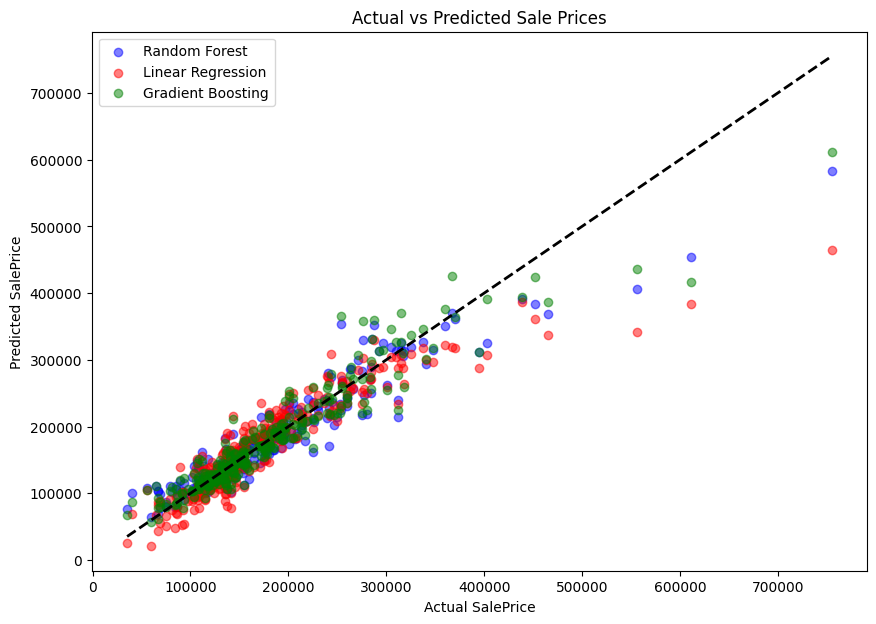

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(y_val, y_pred_rf, alpha=0.5, color='b', label='Random Forest')
plt.scatter(y_val, y_pred_lr, alpha=0.5, color='r', label='Linear Regression')
plt.scatter(y_val, pred_gbr, alpha=0.5, color='g', label='Gradient Boosting')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Sale Prices")
plt.legend()
plt.show()
